# Matplotlib and Pandas

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

## Plot DataFrame with mathplotlib - overview

One of the most common ways to plot data from a DataFrame is using the `plot` method. This method provides a convenient interface for quickly creating common plots of your DataFrame's data.

Here's an example of how to use the plot method to create a line plot of a DataFrame:

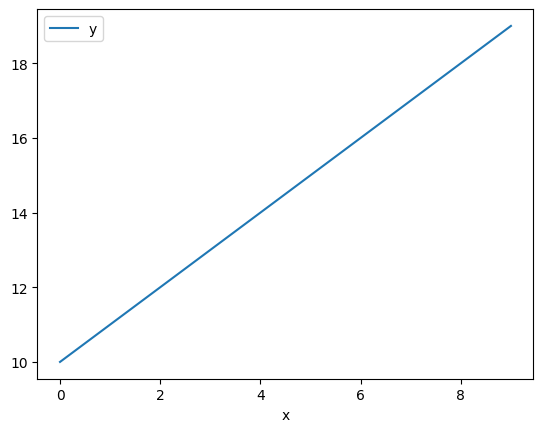

In [2]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y': range(10, 20)})

# plot the data using the 'x' and 'y' columns
df.plot(x='x', y='y')

# show the plot
plt.show()

You can also use the plot method to create other types of plots, such as bar plots, scatter plots, and histograms. For example, here's how you would create a bar plot:

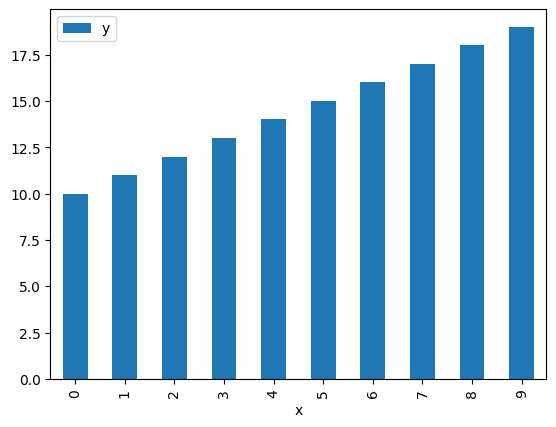

In [3]:
df.plot(kind='bar', x='x', y='y')
plt.show()

### plot multiple columns of a DataFrame

If you want to plot multiple columns of your DataFrame, you'll need to loop through the columns and create a separate plot for each one.

```
# Assume you have a DataFrame called "df"

# Get a list of the column names in the DataFrame
columns = df.columns

# Use a for loop to iterate over the columns
for column in columns:
    # Get the values of the current column
    values = df[column].values

    # Plot the values
    plt.plot(values)

    # Add a title and label the axes
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel('Value')

    # Show the plot
    plt.show()
```

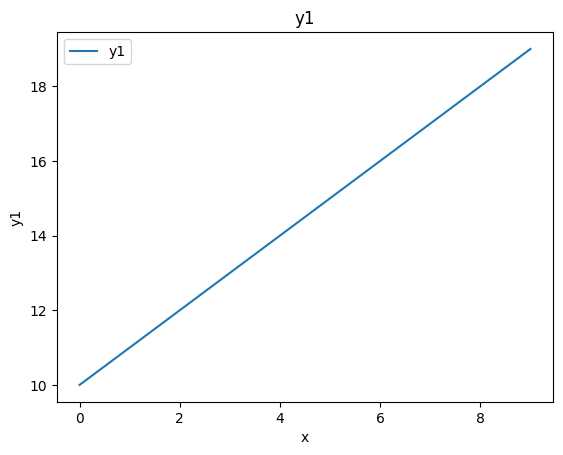

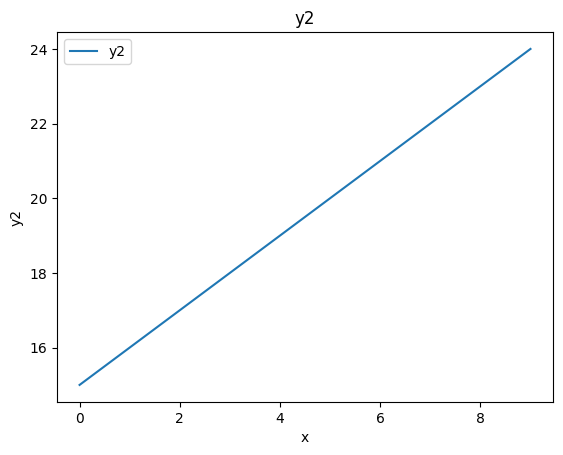

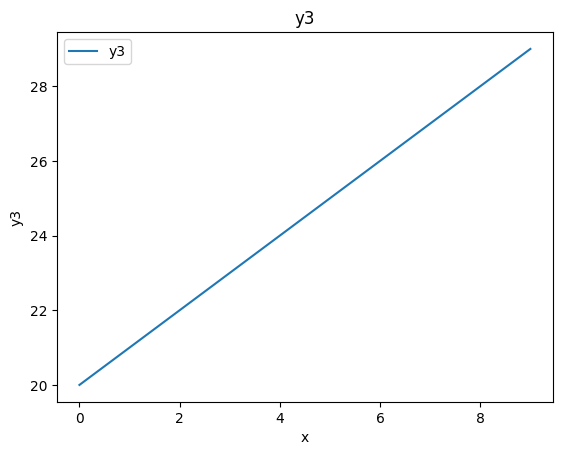

In [4]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

# loop through the columns of the DataFrame
for column in df.columns[1:]:
    # create a line plot for each column
    df.plot(x='x', y=column)
    # add a title and label the axes
    plt.title(column)
    plt.xlabel('x')
    plt.ylabel(column)
    
# show the plot
plt.show()

This will create 3 different plots of scatter plot, one for each column 'y1', 'y2' and 'y3'.

You can also use the subplots method of matplotlib library to plot all the plots in one figure, so you can see the comparison between different columns in one place

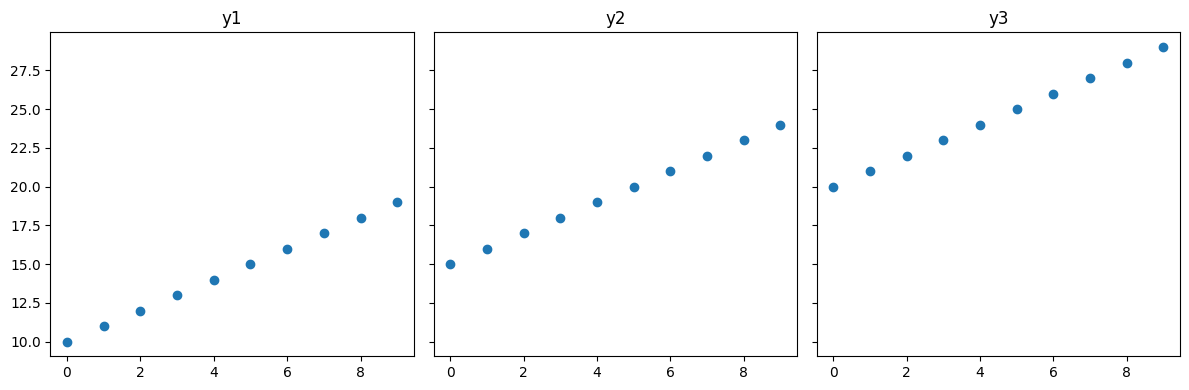

In [5]:
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,4))

for i, column in enumerate(df.columns[1:]):
    axs[i].scatter(df['x'], df[column])
    axs[i].set_title(column)
	
plt.tight_layout()
plt.show()


# Hands on real data

In [6]:
df = pd.read_csv("../../datasets/various/drinks.csv")

## Get some insight from the data

In [7]:
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [8]:
### check for NaN values
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

We have NaN values only in the string fields, which will  not be a problem for now. But lets see which contries does not have a continent assigned:

In [9]:
df.loc[df['continent'].isnull(), ['continent','country']].head(3)
# remove head(3) to see all

,continent,country
5,NaN,Antigua & Barbuda
11,NaN,Bahamas
14,NaN,Barbados


In [10]:
# number of countries per continent:
df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [11]:
# average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False)

continent
EU    142.22
SA     62.42
OC     35.62
AF     16.26
AS      9.07
Name: wine_servings, dtype: float64

## Let's start ploting

**Note:** in next examples we will use the [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) method which is a wrapper of  [matplotlib.pylab](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html). And for each plot we will use the corresponding method on the DataFrame.plot accessor. I.e. instead of df.plot(kind='bar') we will use df.plot.bar(), which are equivalent.



### Bar plots
[DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html)


#### number of countries in each continent

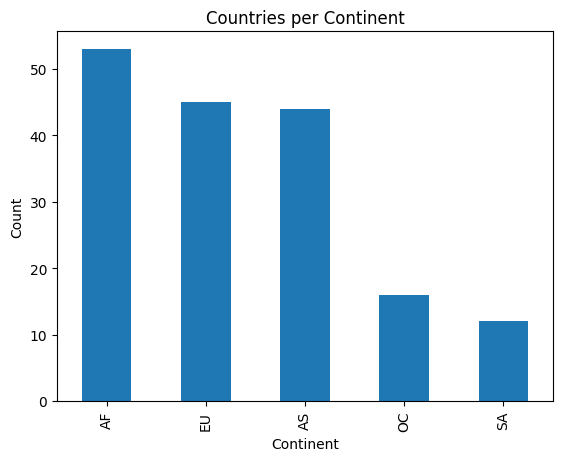

In [12]:
df.continent.value_counts().plot.bar(title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

<AxesSubplot: title={'center': 'average number of wine servings per continent'}, xlabel='continent'>

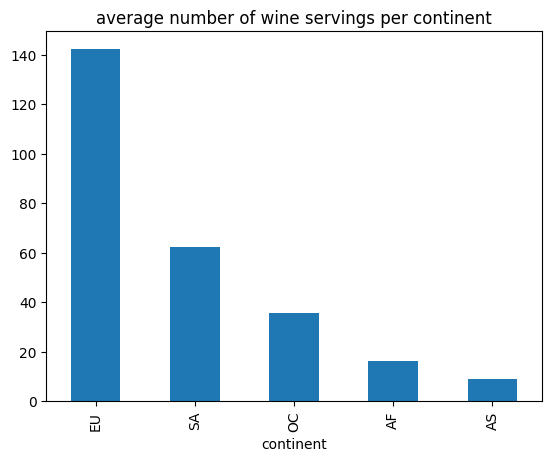

In [13]:
# bar plot average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False).plot(kind='bar', title='average number of wine servings per continent')

### Histogram

[DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html)

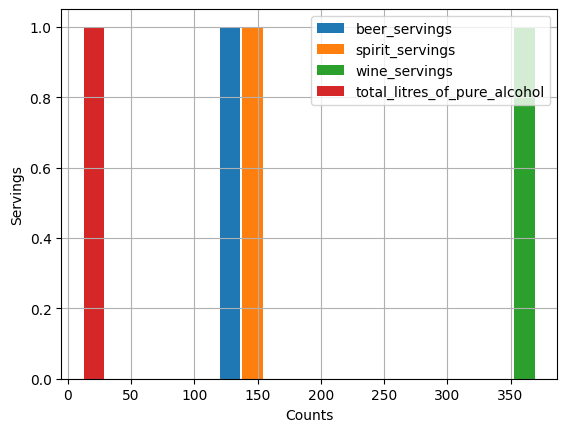

In [14]:
# histogram of wine servings in france
fr = df[df['country'] == 'France']
fr.plot.hist(bins=20, rwidth=0.9)
plt.xlabel('Counts')
plt.ylabel('Servings')
plt.grid()


### Density plot

[DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.density.html)

Text(0.5, 1.0, 'density plot of wine servings')

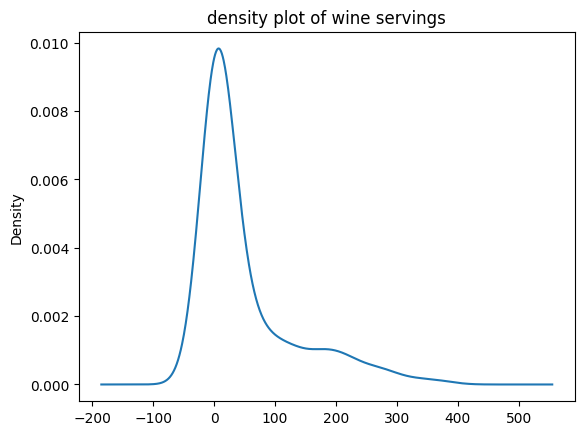

In [15]:
# density plot of wine servings
df['wine_servings'].plot.density()
plt.title('density plot of wine servings')

<AxesSubplot: ylabel='Density'>

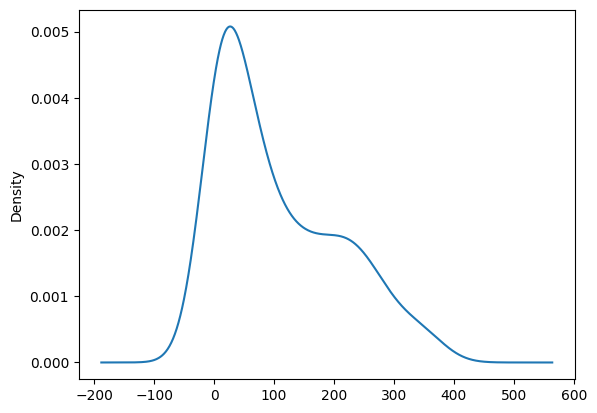

In [16]:
# density plot of beer_servings
df.beer_servings.plot(kind='density')

### Scatter plot

[DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

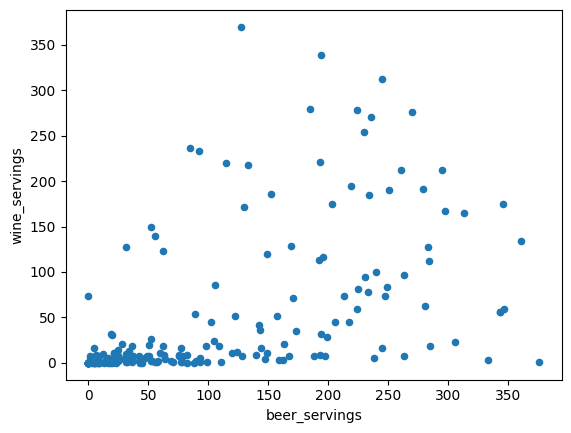

In [17]:
# scatterplot of beer servings versus wine servings
df.plot.scatter(x='beer_servings', y='wine_servings')

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

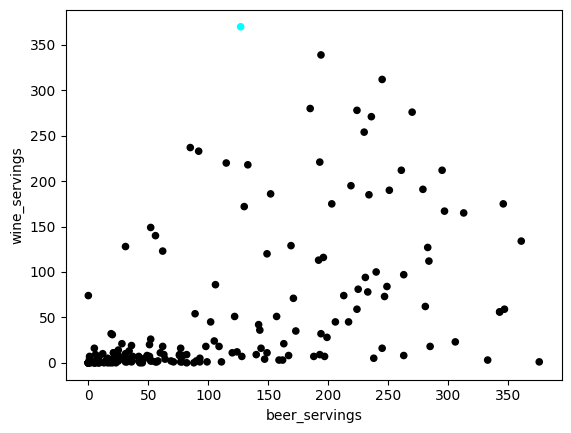

In [18]:
# scatterplot of beer servings versus wine servings (colors by 1 condition)
# np.where(cond, A, B) works like: if(cond)? then A : else B, but on each element of the np.array

# assign a cyan color for France, black - for the rest:
color_france = np.where(df.country=='France', 'cyan', 'black')
df.plot.scatter(x='beer_servings', y='wine_servings',color=color_france)

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

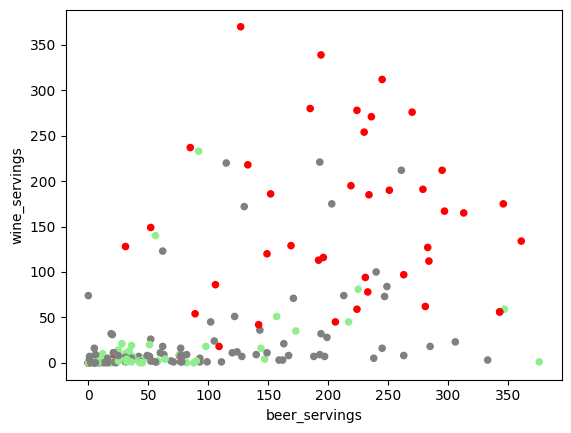

In [19]:
# scatterplot of beer servings versus wine servings (colors more of 1 condition)

# lets make a colors array, which will hold different color values for countries we are interested.
# for the rest - the default color will be 'gray'
colors = np.full_like(df.country, 'gray')

# assign red color for the EU countries:
colors[df.continent=="EU"] = "red"

# assign lightgreen color for the AF countries:
colors[df.continent=="AF"] = "lightgreen"

df.plot.scatter(x='beer_servings', y='wine_servings',color=colors)

### BoxPlot

Reference: [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

### Pie Chart

Reference: [pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)